<a href="https://colab.research.google.com/github/bgkoro/datamining/blob/main/Final_Project_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Data Roti DataMining - Sheet1.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -2].values

In [ ]:
print (x)

[[    2 13000]
 [    1 20000]
 [    1 15000]
 ...
 [    2 16000]
 [    1 15000]
 [    1 13000]]


In [ ]:
print (y)

[0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  4]
 [ 0 51]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


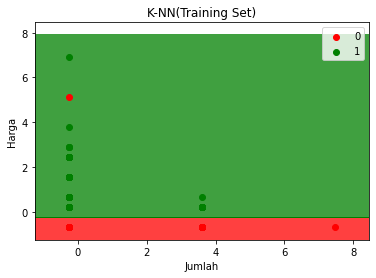

In [102]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x1.min(), x1.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN(Training Set)')
plt.xlabel('Jumlah')
plt.ylabel('Harga')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


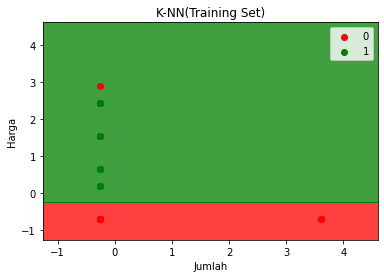

In [103]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x1.min(), x1.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN(Training Set)')
plt.xlabel('Jumlah')
plt.ylabel('Harga')
plt.legend()
plt.show()